In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def Box_Muller(size, mu=0, sigma=1):
    U1 = np.random.uniform(0,1, size)
    U2 = np.random.uniform(0,1, size)
    X = (np.sqrt(-2*np.log(U1))*np.cos(2*np.pi*U2)*sigma) + mu
    Y = (np.sqrt(-2*np.log(U1))*np.sin(2*np.pi*U2)*sigma) + mu
    return X, Y

Box_Muller(10)

(array([ 0.0316347 ,  0.52396176, -0.75904549, -1.31040497,  0.11144695,
        -0.92905246, -1.85434987, -0.6854449 , -0.97309963, -0.02204011]),
 array([ 0.89408987,  1.17258355, -0.19988282,  0.51581716, -0.09675995,
        -0.32620311,  0.74053698,  0.67460727,  0.37923154, -0.88463831]))

In [24]:
def Box_Muller_biegunowa(size):
    p = np.pi/4
    aux = p*(1-p)
    x = (3*np.sqrt(aux) + np.sqrt(9*aux + p*size))/p
    N = np.ceil(x*x)

    V1 = np.random.uniform(-1,1,size)
    V2 = np.random.uniform(-1,1,size)
    R2 = V1*V1 + V2*V2

    index = R2<1

    V1 = V1[index][:size]
    V2 = V2[index][:size]
    R2 = R2[index][:size]
    X = V1 * np.sqrt(-2*np.divide(np.log(R2), R2))
    Y = V2 * np.sqrt(-2*np.divide(np.log(R2), R2))
    return X, Y

Box_Muller_biegunowa(10)

(array([-1.38650777, -0.41323386,  0.54244717, -1.67207778,  0.45702917,
         0.61163161, -0.61754354,  2.19435164]),
 array([ 1.35629754, -1.15469877, -1.54466026, -1.83647312, -0.74627828,
        -2.78443862, -0.0443577 ,  0.22142543]))

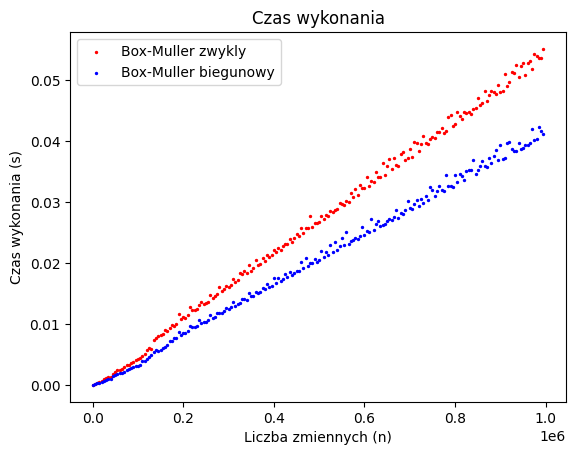

In [23]:
import timeit

n = 1000000
arg = np.arange(0, n, 5000)
czasy1 = []
czasy2 = []

for i in arg:
    czasy_powtorzen1 = []
    czasy_powtorzen2 = []
    for _ in range(10):  
        start1 = timeit.default_timer()
        Box_Muller(i)
        koniec1 = timeit.default_timer()
        czasy_powtorzen1.append(koniec1 - start1)
        
        start2 = timeit.default_timer()
        Box_Muller_biegunowa(i)
        koniec2 = timeit.default_timer()
        czasy_powtorzen2.append(koniec2 - start2)
    
    sredni_czas1 = np.mean(czasy_powtorzen1)
    sredni_czas2 = np.mean(czasy_powtorzen2)
    
    czasy1.append(sredni_czas1)
    czasy2.append(sredni_czas2)

plt.scatter(arg, czasy1, color='red', label='Box-Muller zwykly', s=2)
plt.scatter(arg, czasy2, color='blue', label='Box-Muller biegunowy', s=2)
plt.title('Czas wykonania')
plt.xlabel('Liczba zmiennych (n)')
plt.ylabel('Czas wykonania (s)')
plt.legend()
plt.show()

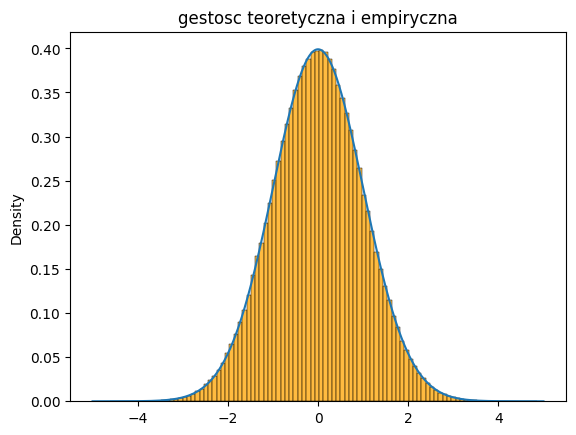

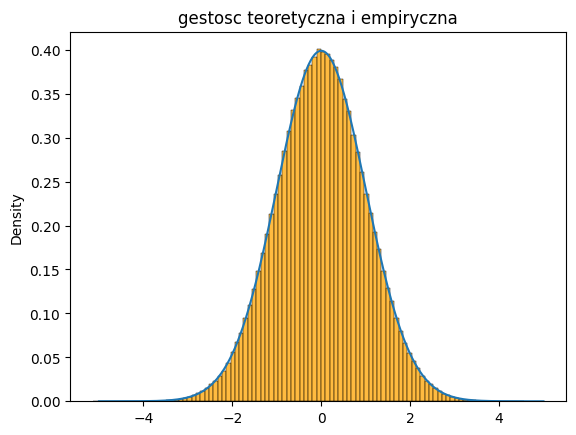

In [54]:
n = 1000000
zwykly1, zwykly2 = Box_Muller(n)
biegunowy1, biegunowy2 = Box_Muller_biegunowa(n)

def pdf_normal(x, mu=0, sigma=1):
    return (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))

x = np.linspace(-5, 5, n)

sns.histplot(zwykly1, bins=100, stat='density', label='Histogram empiryczny', color='orange')
plt.plot(x, pdf_normal(x), label='gestosc teoretyczna')
plt.title("gestosc teoretyczna i empiryczna")
plt.show()

sns.histplot(biegunowy1, bins=100, stat='density', label='Histogram empiryczny', color='orange')
plt.plot(x, pdf_normal(x), label='gestosc teoretyczna')
plt.title("gestosc teoretyczna i empiryczna")
plt.show()



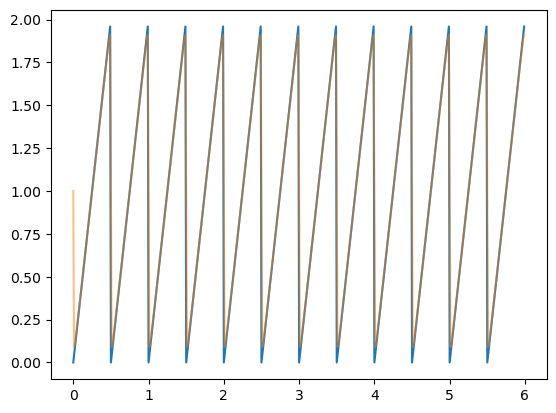

In [16]:
A = 2
T = 1
f = lambda x: 2*A/T * (x % (T/2))
def series(t, N):
    ns = np.arange(1, N+1, 1)
    return A/2 - A/np.pi * np.sum([np.sin(n*4*np.pi/T*t)/n for n in ns])
ts = np.arange(0, 6, 0.01)
plt.plot(ts, f(ts))
plt.plot(ts, [series(t, 100) for t in ts], alpha=0.5)